# Feature Engineering with Python Project

## Defining Research question


### Background
Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.


### Problem Statement
Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.


You will be required to go through the following:
* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion

Import required libraries

In [31]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression

## Data Exploration

In [7]:
#Load dataset from url https://bit.ly/3deaKEM and save in csv file

!wget -O delivery_data.csv https://bit.ly/3deaKEM

delivery_data = open('delivery_data.csv')

for i in range(0,5):
    print(delivery_data.readline())

--2023-07-20 10:27:20--  https://bit.ly/3deaKEM
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/risenW/Practical_feature_engineering_guide/master/sendy_logistics.csv [following]
--2023-07-20 10:27:20--  https://raw.githubusercontent.com/risenW/Practical_feature_engineering_guide/master/sendy_logistics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4094263 (3.9M) [text/plain]
Saving to: ‘delivery_data.csv’

delivery_data.csv   100%[===================>]   3.90M  --.-KB/s    in 0.07s   

2023-07-20 10:27:20 (54.2 MB/s) - ‘delivery_data.csv’ saved [4094263/4094263]

Order No,User 

Explore data saved in csv delivery_data file

In [8]:
#explore stored data
df = pd.read_csv('delivery_data.csv')
pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
df.head()


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [9]:
#explore data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [10]:
# data exploration
# describe the data
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [11]:
# data exploration
# show the data size, (rows, columns)
df.shape

(21201, 29)

In [12]:
#explore data
#check for NaN values
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

# Data Cleaning
* Remove trailing spaces within the data
* Standardize column names cases
* replace spaces in column names with "_"

In [26]:
# Data Cleaning
df.columns = df.columns.str.lower().str.strip()
df.columns

Index(['platform_type', 'placement_-_day_of_month',
       'placement_-_weekday_(mo_=_1)', 'confirmation_-_day_of_month',
       'confirmation_-_weekday_(mo_=_1)', 'arrival_at_pickup_-_day_of_month',
       'arrival_at_pickup_-_weekday_(mo_=_1)', 'pickup_-_day_of_month',
       'pickup_-_weekday_(mo_=_1)', 'arrival_at_destination_-_day_of_month',
       'arrival_at_destination_-_weekday_(mo_=_1)', 'distance_(km)',
       'temperature', 'precipitation_in_millimeters', 'pickup_lat',
       'pickup_long', 'destination_lat', 'destination_long',
       'time_from_pickup_to_arrival'],
      dtype='object')

In [27]:
#replace spaces in column names with "_"
df.columns = [col.replace(" ","_") for col in df.columns]
df.columns

Index(['platform_type', 'placement_-_day_of_month',
       'placement_-_weekday_(mo_=_1)', 'confirmation_-_day_of_month',
       'confirmation_-_weekday_(mo_=_1)', 'arrival_at_pickup_-_day_of_month',
       'arrival_at_pickup_-_weekday_(mo_=_1)', 'pickup_-_day_of_month',
       'pickup_-_weekday_(mo_=_1)', 'arrival_at_destination_-_day_of_month',
       'arrival_at_destination_-_weekday_(mo_=_1)', 'distance_(km)',
       'temperature', 'precipitation_in_millimeters', 'pickup_lat',
       'pickup_long', 'destination_lat', 'destination_long',
       'time_from_pickup_to_arrival'],
      dtype='object')

In [28]:
#
df.head

<bound method NDFrame.head of                                            platform_type  \
platform_type                                   1.000000   
placement_-_day_of_month                        0.012764   
placement_-_weekday_(mo_=_1)                   -0.058038   
confirmation_-_day_of_month                     0.012770   
confirmation_-_weekday_(mo_=_1)                -0.058005   
arrival_at_pickup_-_day_of_month                0.012770   
arrival_at_pickup_-_weekday_(mo_=_1)           -0.058005   
pickup_-_day_of_month                           0.012770   
pickup_-_weekday_(mo_=_1)                      -0.058005   
arrival_at_destination_-_day_of_month           0.012770   
arrival_at_destination_-_weekday_(mo_=_1)      -0.058005   
distance_(km)                                   0.005528   
temperature                                     0.225060   
precipitation_in_millimeters                   -0.055948   
pickup_lat                                     -0.002742   
pickup_lon

## Data Analysis
* using correlation matrix

<ipython-input-16-85b345ff149f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.corr()


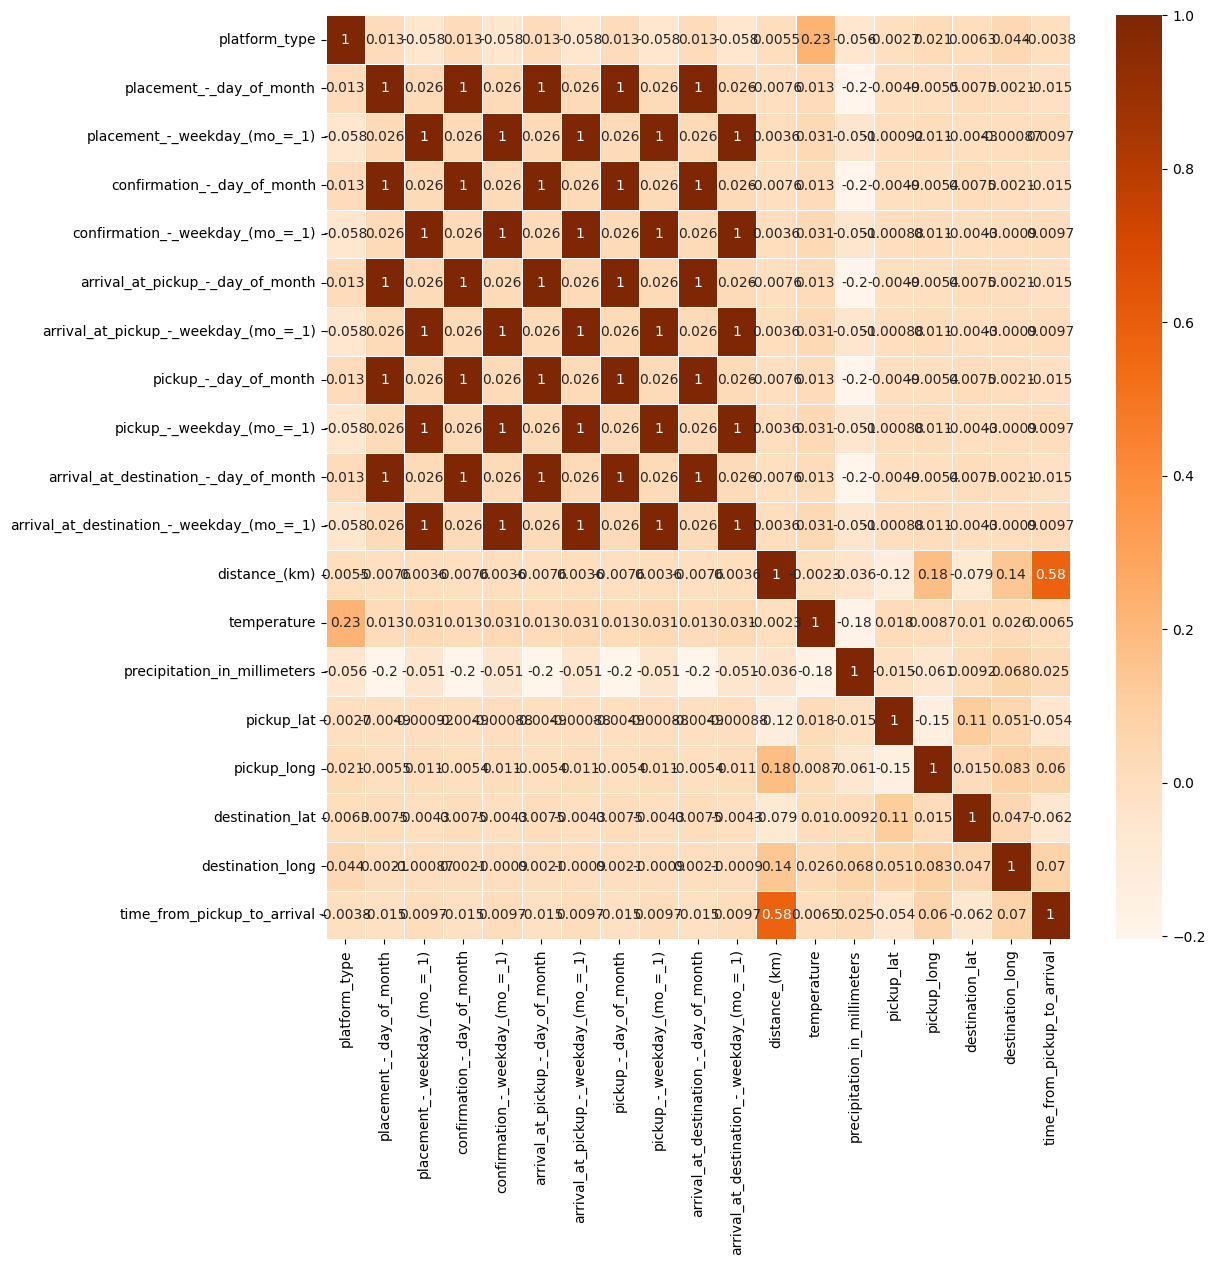

In [16]:
df = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df, annot=True, linewidth=0.5, cmap='Oranges');

# Data Preparaion

In [33]:
#convert categorical data to numerical dala
encode = OrdinalEncoder()
df[["order_no","user_id", "vehicle_type", "personal_or_business", "rider_id"]] = encode.fit_transform(df[["order_no","user_id", "vehicle_type", "personal_or_business", "rider_id"]])

df.head()

KeyError: ignored

## Data Modeling

In [35]:


# fetch dataframe column
y = df["time_from_pickup_to_arrival"]

# get features of dataframe
X = df.drop(columns=["time_from_pickup_to_arrival"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

train1 = LinearRegression()
train2 = xgb.XGBRegressor()
train3 = RandomForestRegressor()

# training all the model on the training dataset
train1.fit(X_train, y_train)
train2.fit(X_train, y_train)
train3.fit(X_train, y_train)

# predicting the output on the validation dataset
res1 = train1.predict(X_test)
res2 = train2.predict(X_test)
res3 = train3.predict(X_test)

# final prediction after averaging on the prediction of all 3 models
resfinal = (res1+res2+res3)/3.0

# printing the root mean squared error between real value and predicted value
print(np.sqrt(mean_squared_error(y_test, resfinal)))

0.3256034610162445


# Challenge your solution

Feature engineering aspects of cleaning data, feature scaling and transformation, removing of null values etc improves the performance of a machine learning model

Performance of machine learning model is improved by feature engineering proceedures such as data cleaning exploration and analysis

-Average delivery time for the two customer types is almost similar

# Recommendation and Concluion

Data provided was adequate for testing the model